In [2]:
import base64
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch

In [3]:
def plot_NMR(hsqc, c_tensor, h_tensor):
    # print(hsqc, c_tensor, h_tensor)
    # Create a 2x2 grid for subplots
    fig = plt.figure(figsize=(6, 4.8))  # Overall figure size
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 20], width_ratios=[1, 20])

    # Create subplots in different locations and sizes
    ax1 = fig.add_subplot(gs[1, 1])  # Takes up the first row
    if hsqc is not None:
        pos = hsqc[hsqc[:,2]>0]
        neg = hsqc[hsqc[:,2]<0]
        ax1.scatter(pos[:,1], pos[:,0], c="blue", label="CH or CH3", s=5)
        ax1.scatter(neg[:,1], neg[:,0], c="red", label="CH2", s=5)
        # print("scatter!!")
        # print(pos, neg)
    ax1.set_title("HSQC")
    ax1.set_xlabel('Proton Shift (1H)')  # X-axis label
    ax1.set_xlim([0, 12])
    ax1.set_ylim([0, 220])
    ax1.invert_yaxis()
    ax1.invert_xaxis()
    ax1.legend()


    ax2 = fig.add_subplot(gs[1, 0])  # Smaller subplot
    if c_tensor is not None:
        ax2.scatter( torch.ones(len(c_tensor)), c_tensor[:,0], c="black", s=2)
    ax2.set_ylim([0, 220])
    ax2.set_title("13C-NMR")
    ax2.set_ylabel('Carbon Shift (13C)')
    ax2.set_xticks([])
    ax2.invert_yaxis()
    ax2.invert_xaxis()

    ax3 = fig.add_subplot(gs[0, 1])  # Smaller subplot
    if h_tensor is not None:
        ax3.scatter(h_tensor[:,0], torch.ones(len(h_tensor)),c="black", s=2)
    ax3.set_xlim([0, 12])
    ax3.set_title("1H-NMR")
    ax3.set_yticks([])
    ax3.invert_yaxis()
    ax3.invert_xaxis()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

In [ ]:
import torch.nn.functional as F
import torch, numpy as np
def convert_to_tensor_1d_nmr(tensor_1d):
    try:
        if tensor_1d == "":
            tensor_1d = None
        else:
            c_vals = np.fromstring(tensor_1d, sep=",")
            print(c_vals)
            tensor_1d = np.zeros((c_vals.shape[0], 3))
            tensor_1d[:,0] = c_vals
            tensor_1d = torch.tensor(tensor_1d).float()
        tensor_1d = F.pad(tensor_1d.view(-1, 1), (0, 2), "constant", 0)
        return tensor_1d
    except Exception as e:
        raise e

In [16]:
tensor_1d = "6.55, 6.53, 5.82, 5.81, 5.31, 5.30, 5.28, 5.27, 5.07, 4.85, 4.84, 4.83, 4.82, 4.50, 4.50, 3.95, 3.85, 3.85, 3.04, 2.60, 2.59, 2.58, 2.57, 2.39, 2.37, 2.36, 2.31, 2.29, 2.28, 2.26, 2.24, 2.24, 2.23, 2.22, 2.22, 2.21, 2.08, 2.07, 2.06, 2.05, 1.56, 1.55, 1.53, 1.51, 1.46, 1.45, 1.10, 1.08, 1.05, 1.04, 1.02, 1.00, 0.93, 0.91, 0.90, 0.90, 0.89, 0.88, 0.86, 0.78, 0.77"

c_vals = np.fromstring(tensor_1d, sep=",")
print(c_vals, len(c_vals))
tensor_1d = np.zeros((c_vals.shape[0], 3))
tensor_1d.shape

[6.55 6.53 5.82 5.81 5.31 5.3  5.28 5.27 5.07 4.85 4.84 4.83 4.82 4.5
 4.5  3.95 3.85 3.85 3.04 2.6  2.59 2.58 2.57 2.39 2.37 2.36 2.31 2.29
 2.28 2.26 2.24 2.24 2.23 2.22 2.22 2.21 2.08 2.07 2.06 2.05 1.56 1.55
 1.53 1.51 1.46 1.45 1.1  1.08 1.05 1.04 1.02 1.   0.93 0.91 0.9  0.9
 0.89 0.88 0.86 0.78 0.77] 61


(61, 3)

In [17]:
tensor_1d[:,0] = c_vals
tensor_1d 
# tensor_1d = torch.tensor(tensor_1d).float()
# tensor_1d = F.pad(tensor_1d.view(-1, 1), (0, 2), "constant", 0)

array([[6.55, 0.  , 0.  ],
       [6.53, 0.  , 0.  ],
       [5.82, 0.  , 0.  ],
       [5.81, 0.  , 0.  ],
       [5.31, 0.  , 0.  ],
       [5.3 , 0.  , 0.  ],
       [5.28, 0.  , 0.  ],
       [5.27, 0.  , 0.  ],
       [5.07, 0.  , 0.  ],
       [4.85, 0.  , 0.  ],
       [4.84, 0.  , 0.  ],
       [4.83, 0.  , 0.  ],
       [4.82, 0.  , 0.  ],
       [4.5 , 0.  , 0.  ],
       [4.5 , 0.  , 0.  ],
       [3.95, 0.  , 0.  ],
       [3.85, 0.  , 0.  ],
       [3.85, 0.  , 0.  ],
       [3.04, 0.  , 0.  ],
       [2.6 , 0.  , 0.  ],
       [2.59, 0.  , 0.  ],
       [2.58, 0.  , 0.  ],
       [2.57, 0.  , 0.  ],
       [2.39, 0.  , 0.  ],
       [2.37, 0.  , 0.  ],
       [2.36, 0.  , 0.  ],
       [2.31, 0.  , 0.  ],
       [2.29, 0.  , 0.  ],
       [2.28, 0.  , 0.  ],
       [2.26, 0.  , 0.  ],
       [2.24, 0.  , 0.  ],
       [2.24, 0.  , 0.  ],
       [2.23, 0.  , 0.  ],
       [2.22, 0.  , 0.  ],
       [2.22, 0.  , 0.  ],
       [2.21, 0.  , 0.  ],
       [2.08, 0.  , 0.  ],
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[6.55 6.53 5.82 5.81 5.31 5.3  5.28 5.27 5.07 4.85 4.84 4.83 4.82 4.5
 4.5  3.95 3.85 3.85 3.04 2.6  2.59 2.58 2.57 2.39 2.37 2.36 2.31 2.29
 2.28 2.26 2.24 2.24 2.23 2.22 2.22 2.21 2.08 2.07 2.06 2.05 1.56 1.55
 1.53 1.51 1.46 1.45 1.1  1.08 1.05 1.04 1.02 1.   0.93 0.91 0.9  0.9
 0.89 0.88 0.86 0.78 0.77]


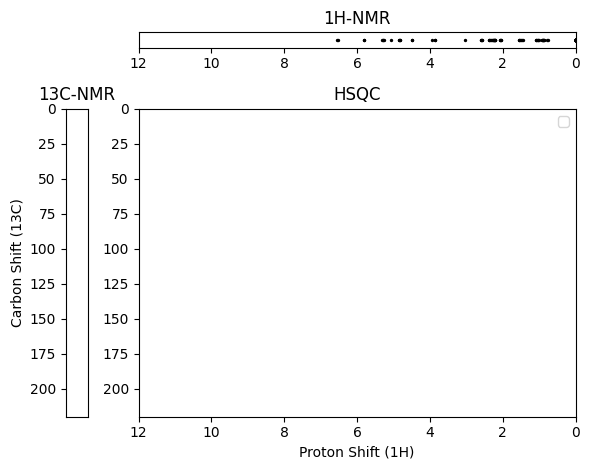

In [ ]:
h_tensor = "6.55, 6.53, 5.82, 5.81, 5.31, 5.30, 5.28, 5.27, 5.07, 4.85, 4.84, 4.83, 4.82, 4.50, 4.50, 3.95, 3.85, 3.85, 3.04, 2.60, 2.59, 2.58, 2.57, 2.39, 2.37, 2.36, 2.31, 2.29, 2.28, 2.26, 2.24, 2.24, 2.23, 2.22, 2.22, 2.21, 2.08, 2.07, 2.06, 2.05, 1.56, 1.55, 1.53, 1.51, 1.46, 1.45, 1.10, 1.08, 1.05, 1.04, 1.02, 1.00, 0.93, 0.91, 0.90, 0.90, 0.89, 0.88, 0.86, 0.78, 0.77"

# h_tensor = convert_to_tensor_1d_nmr(h_tensor)
# plot_NMR(None, None, h_tensor)

In [15]:
h_tensor

tensor([[6.5500, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [6.5300, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.8200, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.8100, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.3100, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.3000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.2800, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.2700, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [5.0700, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [4.8500, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.000